In [19]:
import numpy as np
import matplotlib.pyplot as plt

def MatGenerator(a,b,K,α,β,N,g):
    H=(b-a)/N
    x=np.linspace(a,b,N+1)
    bb=np.zeros(N+1)
    bb=g(x)
    bb[0]=α
    bb[-1]=β
    
    A=np.zeros((N+1,N+1))
    A[0,0]=1
    A[-1,-1]=1
    
    for j in range(1,N):
        A[j,j-1]=-1
        A[j,j]=2
        A[j,j+1]=-1
        
    return A,bb

In [20]:
a=0
b=1
K=1
α=-4
β=0
N=100
g=lambda x:-4*(1+x)*np.exp(x)

A,bb=MatGenerator(a,b,K,α,β,N,g)
A

# w=np.linalg.solve(A,bb)

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  2., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  2., -1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [93]:
import numpy as np
import matplotlib.pyplot as plt

def MatGenerator1(a,b,K,α,β,N,g):
    H=(b-a)/N
    x=np.linspace(a,b,N+1)
    B=np.zeros(N+1)
    B=g(x)
    B[0]=α
    B[-1]=β
    
    A_=np.zeros((N+1,N+1))
    A_[0,0]=1
    A_[-1,-1]=1 
    
    
    for i in range(1,N):       
        A_[i,i+1]=(1/H**2)*(-K(x[i]+H/2))
        A_[i,i]=(1/H**2)*(K(x[i]-H/2)+K(x[i]+H/2))
        A_[i,i-1]=(1/H**2)*(-K(x[i]-H/2))
    return A_,B

In [94]:
K=lambda x:x**2
g=lambda x: -4*(x**3+3*x**2)*np.exp(x+1)
a=-1
b=1
α=-8
β=0
N=100
x=np.linspace(a,b,N+1)
A_,B=MatGenerator1(a,b,K,α,β,N,g)
A_,B

(array([[ 1.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
          0.00000e+00,  0.00000e+00],
        [-2.45025e+03,  4.80250e+03, -2.35225e+03, ...,  0.00000e+00,
          0.00000e+00,  0.00000e+00],
        [ 0.00000e+00, -2.35225e+03,  4.60850e+03, ...,  0.00000e+00,
          0.00000e+00,  0.00000e+00],
        ...,
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  4.60850e+03,
         -2.35225e+03,  0.00000e+00],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ..., -2.35225e+03,
          4.80250e+03, -2.45025e+03],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
          0.00000e+00,  1.00000e+00]]),
 array([-8.00000000e+00, -7.91679505e+00, -7.82716347e+00, -7.73108749e+00,
        -7.62855953e+00, -7.51958293e+00, -7.40417260e+00, -7.28235581e+00,
        -7.15417290e+00, -7.01967809e+00, -6.87894033e+00, -6.73204418e+00,
        -6.57909064e+00, -6.42019820e+00, -6.25550371e+00, -6.08516350e+00,
        -5.90935439e+00, -5.72827

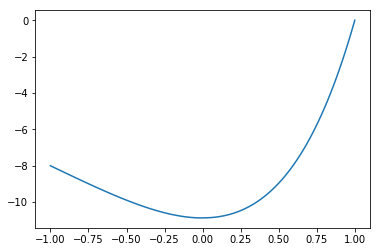

In [95]:
w=np.linalg.solve(A_,B)
plt.plot(x,w)
plt.show()

In [96]:
# A_[i,i-1]=(1/H**2)*(K(x[i]-H/2)+K(x[i]+H/2))
#         A_[i,i]=(1/H**2)*(-K(x[i]-H/2))
#         A_[i,i+1]=(1/H**2)*(-K(x[i]+H/2))